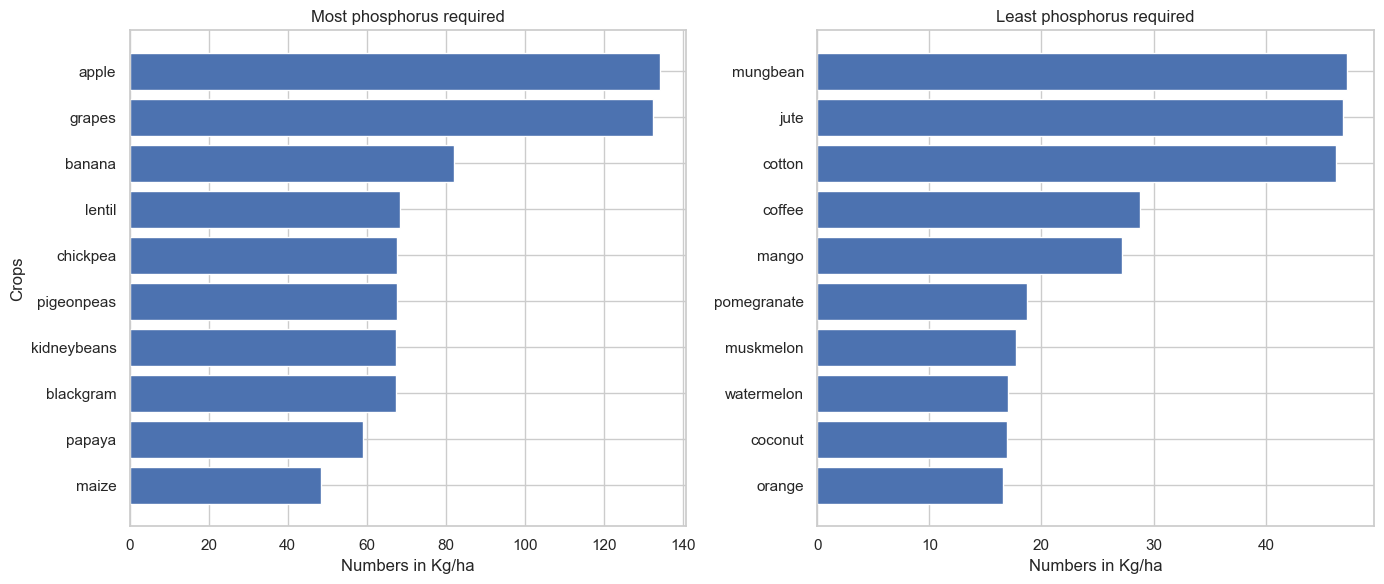

Images saved as 'phosphorus_requirements.png' and 'phosphorus_requirements.jpg'


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

# Load dataset
df = pd.read_csv('Crop_recommendation.csv')

# Compute mean Phosphorus requirement per crop
meanP = df.groupby('label')['P'].mean().sort_values()

# Lowest 10 (least phosphorus required) and highest 10 (most phosphorus required)
lowestP = meanP.head(10)
highestP = meanP.tail(10)

# ---- PLOT ---- #
plt.figure(figsize=(14,6))

# ---------------- LEFT: Most Phosphorus Required ---------------- #
plt.subplot(1, 2, 1)
plt.barh(highestP.index, highestP.values)
plt.title("Most phosphorus required")
plt.xlabel("Numbers in Kg/ha")
plt.ylabel("Crops")

# ---------------- RIGHT: Least Phosphorus Required ---------------- #
plt.subplot(1, 2, 2)
plt.barh(lowestP.index, lowestP.values)
plt.title("Least phosphorus required")
plt.xlabel("Numbers in Kg/ha")

plt.tight_layout()

# ---- SAVE IMAGES FOR DOWNLOAD ---- #
plt.savefig("phosphorus_requirements.png", dpi=300, bbox_inches="tight")
plt.savefig("phosphorus_requirements.jpg", dpi=300, bbox_inches="tight")

plt.show()

print("Images saved as 'phosphorus_requirements.png' and 'phosphorus_requirements.jpg'")


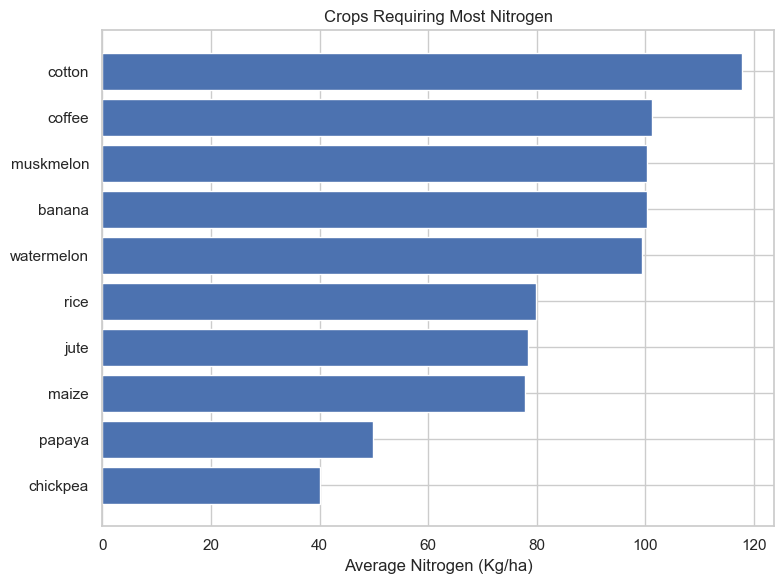

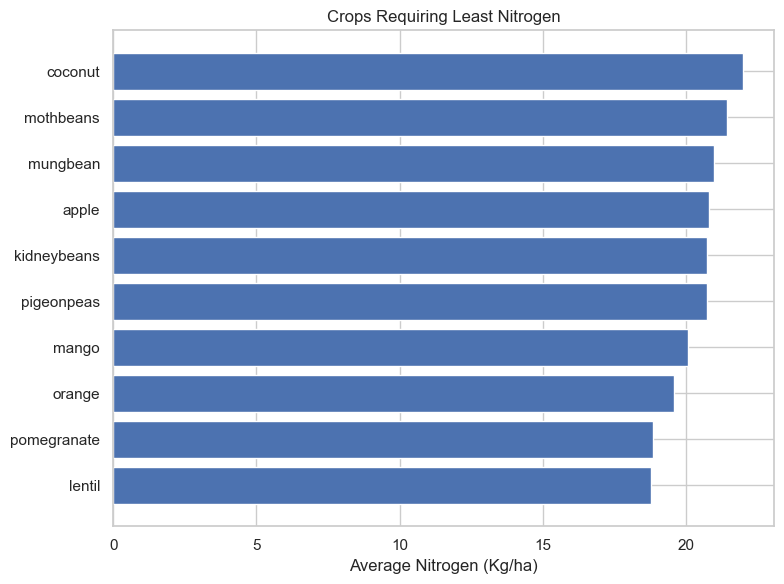

In [74]:
# Load data
df = pd.read_csv('Crop_recommendation.csv')

# Compute mean Nitrogen requirement per crop
meanN = df.groupby('label')['N'].mean().sort_values()
# Lowest 10 and highest 10 nitrogen requirements
lowest = meanN.head(10)
highest = meanN.tail(10)

# ----- FIGURE 1: Crops Requiring Most Nitrogen -----
plt.figure(figsize=(8,6))
plt.barh(highest.index, highest.values)
plt.xlabel("Average Nitrogen (Kg/ha)")
plt.title("Crops Requiring Most Nitrogen")
plt.tight_layout()

# SAVE IMAGE
plt.savefig("highest_nitrogen_crops.png", dpi=300, bbox_inches='tight')

plt.show()

# ----- FIGURE 2: Crops Requiring Least Nitrogen -----
plt.figure(figsize=(8,6))
plt.barh(lowest.index, lowest.values)
plt.xlabel("Average Nitrogen (Kg/ha)")
plt.title("Crops Requiring Least Nitrogen")
plt.tight_layout()

# SAVE IMAGE
plt.savefig("lowest_nitrogen_crops.png", dpi=300, bbox_inches='tight')

plt.show()


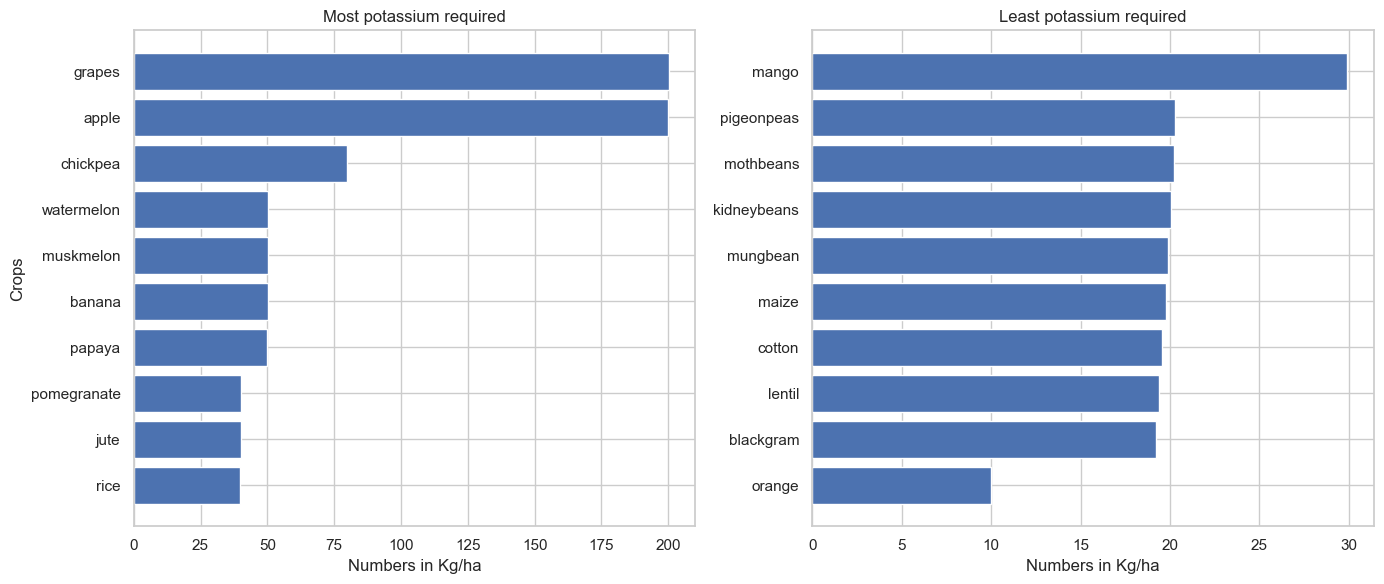

In [76]:
# Load dataset
df = pd.read_csv('Crop_recommendation.csv')

# Compute mean Potassium (K) requirement per crop
meanK = df.groupby('label')['K'].mean().sort_values()

# Lowest 10 and highest 10 potassium requirements
lowestK = meanK.head(10)
highestK = meanK.tail(10)

# ---- PLOT ---- #
plt.figure(figsize=(14,6))

# ---------------- LEFT: Most Potassium Required ---------------- #
plt.subplot(1, 2, 1)
plt.barh(highestK.index, highestK.values)
plt.title("Most potassium required")
plt.xlabel("Numbers in Kg/ha")
plt.ylabel("Crops")

# Save first subplot
plt.savefig("highest_potassium.png", bbox_inches='tight')

# ---------------- RIGHT: Least Potassium Required ---------------- #
plt.subplot(1, 2, 2)
plt.barh(lowestK.index, lowestK.values)
plt.title("Least potassium required")
plt.xlabel("Numbers in Kg/ha")

# Save second subplot
plt.savefig("lowest_potassium.png", bbox_inches='tight')

plt.tight_layout()
plt.show()


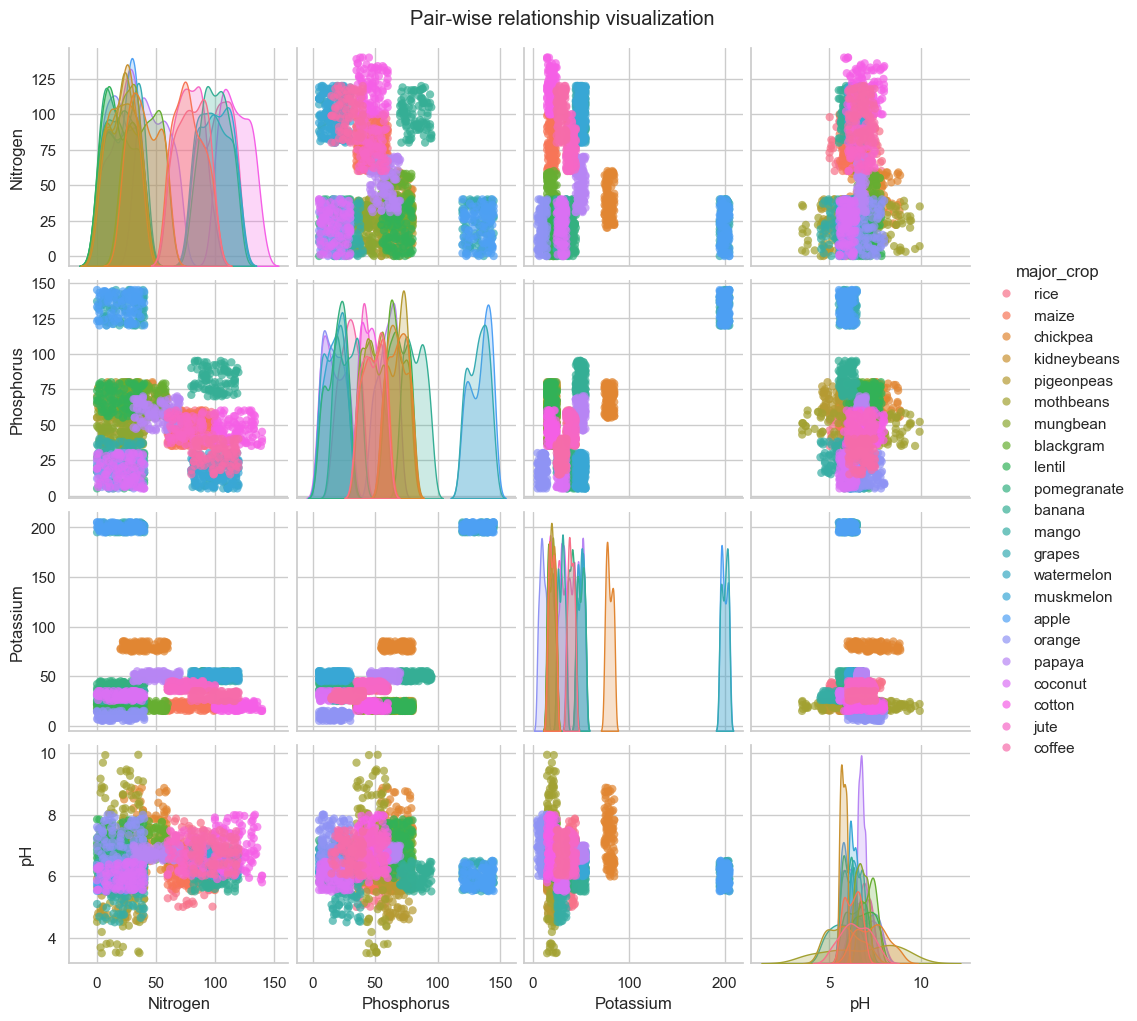

In [80]:
# Load dataset
df = pd.read_csv('Crop_recommendation.csv')

# Select variables to visualize
data = df[['N', 'P', 'K', 'ph', 'label']]

# Rename for prettier axis labels
data = data.rename(columns={
    'N': 'Nitrogen',
    'P': 'Phosphorus',
    'K': 'Potassium',
    'ph': 'pH',
    'label': 'major_crop'
})

# Create pairplot
sns.set(style="whitegrid")

pair = sns.pairplot(
    data,
    hue="major_crop",
    diag_kind="kde",
    height=2.5,
    plot_kws={'alpha': 0.7, 's': 35, 'edgecolor': 'none'},
    diag_kws={'fill': True}
)

pair.fig.suptitle("Pair-wise relationship visualization", y=1.02)

# --- SAVE PLOT FOR DOWNLOAD ---
pair.savefig("pairplot_crops.png", dpi=300, bbox_inches='tight')

plt.show()


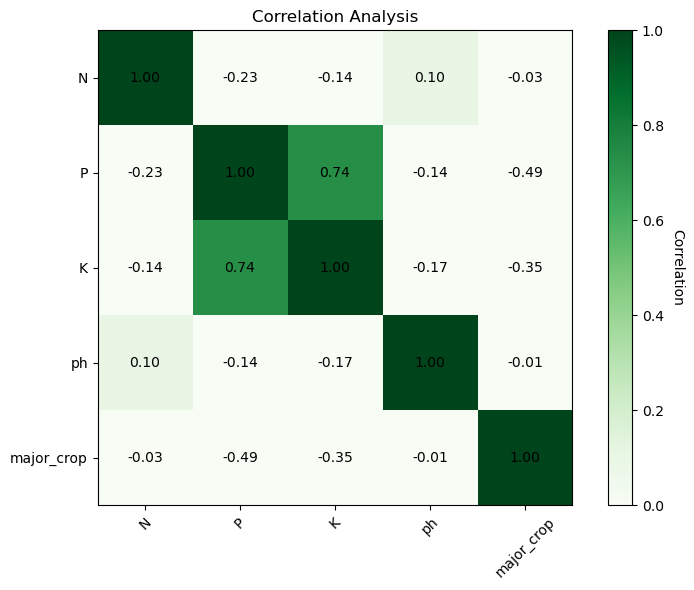

✔ Heatmap saved as: correlation_analysis.png


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Crop_recommendation.csv')

# Encode crop type as numeric for correlation
df['major_crop'] = df['label'].astype('category').cat.codes

# Select only the variables needed
corr_df = df[['N', 'P', 'K', 'ph', 'major_crop']]

# Compute correlation matrix
corr_matrix = corr_df.corr()

# ----- PLOT HEATMAP USING MATPLOTLIB ONLY ----- #
plt.figure(figsize=(8, 6))

im = plt.imshow(corr_matrix, cmap='Greens', vmin=0, vmax=1)

# Add correlation numbers
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                 ha="center", va="center", color="black")

# Set ticks and labels
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrix.index)), corr_matrix.index)

# Add colorbar
cbar = plt.colorbar(im)
cbar.set_label("Correlation", rotation=270, labelpad=15)

plt.title("Correlation Analysis")
plt.tight_layout()

# ---------- SAVE PLOT FOR DOWNLOAD ----------
plt.savefig("correlation_analysis.png", dpi=300, bbox_inches='tight')

plt.show()

print("✔ Heatmap saved as: correlation_analysis.png")


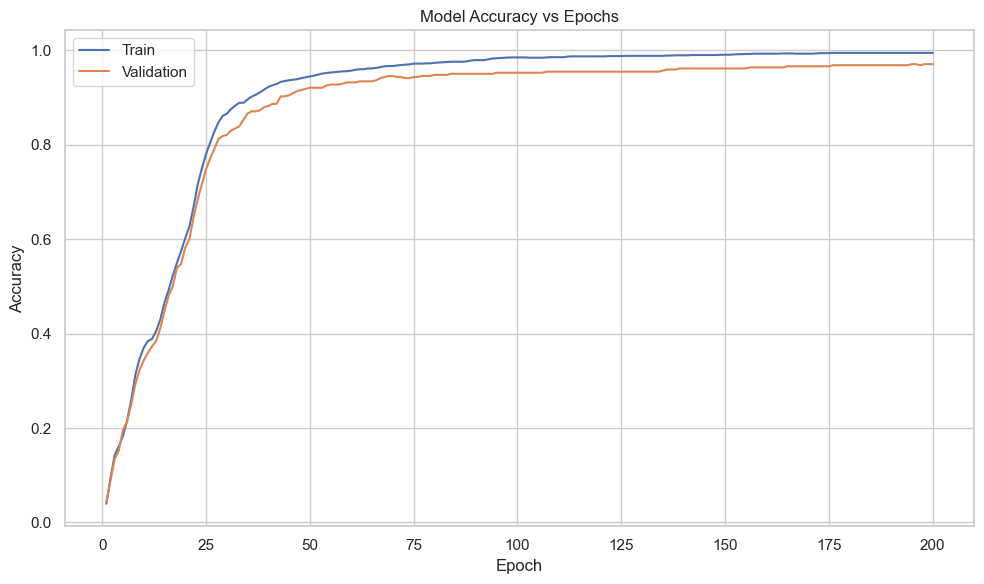

In [83]:
# 1. Load Dataset
# -------------------------------
df = pd.read_csv('Crop_recommendation.csv')

# Features and labels
X = df[['N','P','K','temperature','humidity','ph','rainfall']]
y = LabelEncoder().fit_transform(df['label'])

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# -------------------------------
# 2. Build and Train Neural Network
# -------------------------------
mlp = MLPClassifier(
    hidden_layer_sizes=(32,16),
    activation='relu',
    max_iter=1,          # must be 1 for warm_start training
    warm_start=True,
    random_state=42
)

train_acc = []
val_acc = []

classes = np.unique(y_train)

# Train for 200 epochs
for epoch in range(200):
    mlp.partial_fit(X_train, y_train, classes=classes)

    # Predictions
    pred_train = mlp.predict(X_train)
    pred_val = mlp.predict(X_val)

    # Accuracy scores
    train_acc.append(accuracy_score(y_train, pred_train))
    val_acc.append(accuracy_score(y_val, pred_val))

# -------------------------------
# 3. Plot Accuracy Curve (Figure 8)
# -------------------------------
epochs = range(1, 201)

plt.figure(figsize=(10,6))
plt.plot(epochs, train_acc, label='Train')
plt.plot(epochs, val_acc, label='Validation')

plt.title('Model Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()

# --- SAVE PLOT FOR DOWNLOAD ---
pair.savefig("Model Accuracy vs Epochs.png", dpi=300, bbox_inches='tight')

plt.show()

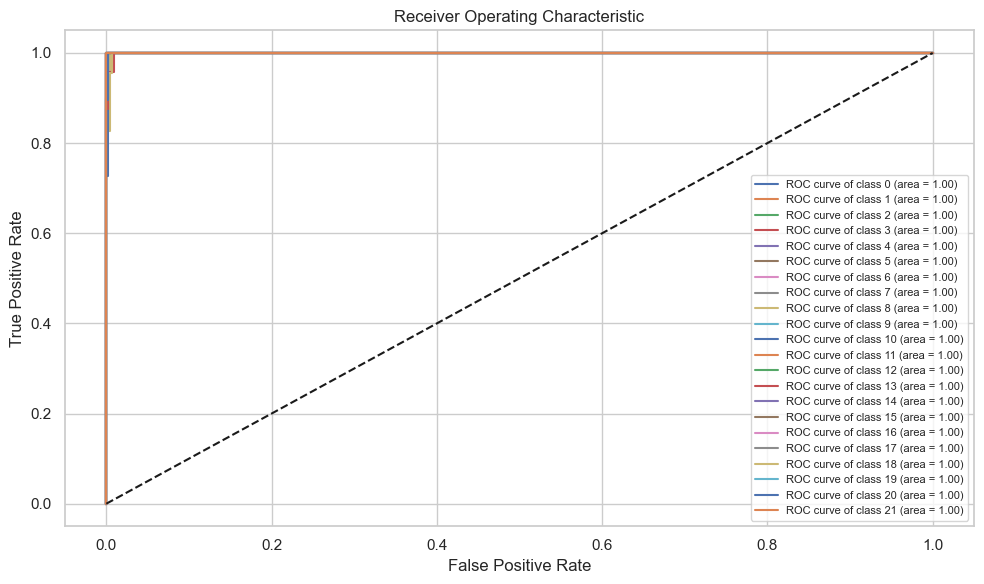

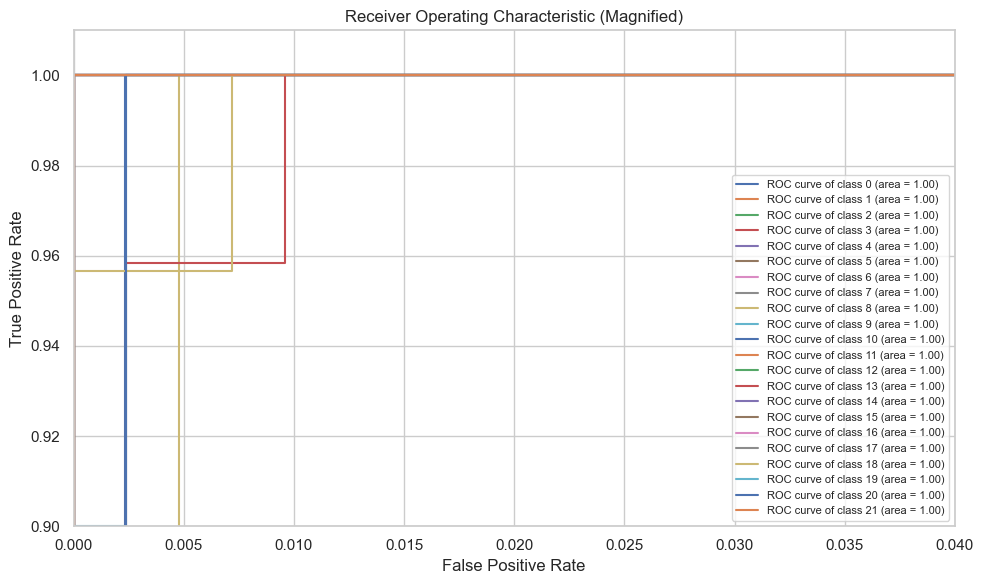

In [84]:
# -------------------- Figure 9(a): Full ROC Plot --------------------
plt.figure(figsize=(10,6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_bin_val[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"ROC curve of class {cls} (area = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize=8)
plt.tight_layout()

# --- SAVE PLOT FOR DOWNLOAD ---
plt.savefig("roc_full.png", dpi=300, bbox_inches='tight')

plt.show()


# -------------------- Figure 9(b): Magnified ROC Plot --------------------
plt.figure(figsize=(10,6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_bin_val[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"ROC curve of class {cls} (area = {roc_auc:.2f})")

plt.xlim(0, 0.04)
plt.ylim(0.90, 1.01)
plt.title("Receiver Operating Characteristic (Magnified)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize=8)
plt.tight_layout()

# --- SAVE PLOT FOR DOWNLOAD ---
plt.savefig("roc_magnified.png", dpi=300, bbox_inches='tight')

plt.show()


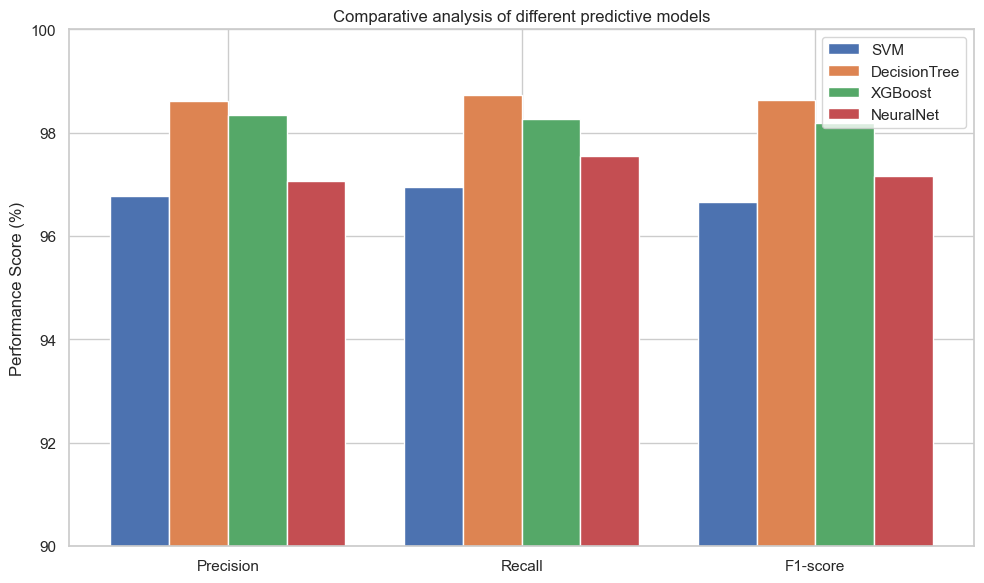

In [85]:
# ---------------------------------------------------------
# 4. Plot Figure 10 — Model Comparison
# ---------------------------------------------------------
labels = ["Precision", "Recall", "F1-score"]
data = np.array([precision_vals, recall_vals, f1_vals])
model_names = list(models.keys())

x = np.arange(len(labels))
width = 0.2  # width of each bar

plt.figure(figsize=(10,6))

for i in range(len(model_names)):
    plt.bar(x + i*width, data[:, i], width=width, label=model_names[i])

plt.xticks(x + width*1.5, labels)
plt.ylabel("Performance Score (%)")
plt.ylim(90, 100)
plt.title("Comparative analysis of different predictive models")
plt.legend()
plt.tight_layout()

# 🔽 SAVE FIGURE FOR DOWNLOAD
plt.savefig("model_comparison.png", dpi=300, bbox_inches='tight')

plt.show()


In [65]:
# Load dataset
df = pd.read_csv('Crop_recommendation.csv')

# Compute mean N, P, K, pH for each crop
table = df.groupby('label')[['N','P','K','ph']].mean().round(2).reset_index()

# Rename columns to match your table
table.rename(columns={
    'label': 'Major_CROP',
    'N': 'Nitrogen',
    'P': 'Phosphorus',
    'K': 'Potassium',
    'ph': 'pH'
}, inplace=True)

# Display final table
table


,Major_CROP,Nitrogen,Phosphorus,Potassium,pH
0,apple,20.80,134.22,199.89,5.93
1,banana,100.23,82.01,50.05,5.98
2,blackgram,40.02,67.47,19.24,7.13
3,chickpea,40.09,67.79,79.92,7.34
4,coconut,21.98,16.93,30.59,5.98
5,coffee,101.20,28.74,29.94,6.79
6,cotton,117.77,46.24,19.56,6.91
7,grapes,23.18,132.53,200.11,6.03
8,jute,78.40,46.86,39.99,6.73
9,kidneybeans,20.75,67.54,20.05,5.75


In [66]:
# Load dataset
df = pd.read_csv('Crop_recommendation.csv')

# Compute mean pH per crop
crop_ph = df.groupby("label")["ph"].mean().reset_index()
crop_ph.rename(columns={"label": "Major_CROP", "ph": "Mean_pH"}, inplace=True)

# Function to classify soil quality based on pH
def classify_soil(pH):
    if pH < 4.5:
        return "Strongly acidic"
    elif 4.5 <= pH <= 5.5:
        return "Highly acidic"
    elif 5.6 <= pH <= 6.5:
        return "Moderately acidic"
    elif 6.6 <= pH <= 7.0:
        return "Slightly acidic"
    elif pH == 7.0:
        return "Neutral"
    elif 7.1 <= pH <= 8.0:
        return "Slightly alkaline"
    elif 8.1 <= pH <= 9.0:
        return "Moderately alkaline"
    elif 9.1 <= pH <= 10.0:
        return "Strongly alkaline"
    else:
        return "Very strongly alkaline"

# Apply classification
crop_ph["Soil_Quality"] = crop_ph["Mean_pH"].apply(classify_soil)

# Round pH for cleaner table
crop_ph["Mean_pH"] = crop_ph["Mean_pH"].round(2)

crop_ph

,Major_CROP,Mean_pH,Soil_Quality
0,apple,5.93,Moderately acidic
1,banana,5.98,Moderately acidic
2,blackgram,7.13,Slightly alkaline
3,chickpea,7.34,Slightly alkaline
4,coconut,5.98,Moderately acidic
5,coffee,6.79,Slightly acidic
6,cotton,6.91,Slightly acidic
7,grapes,6.03,Moderately acidic
8,jute,6.73,Slightly acidic
9,kidneybeans,5.75,Moderately acidic


In [67]:
# Load dataset
df = pd.read_csv('Crop_recommendation.csv')

# Compute min–max ranges for N, P, K, pH
table3 = (
    df.groupby("label")[["N","P","K","ph"]]
      .agg(["min","max"])
      .round(2)
)

# Flatten MultiIndex column names
table3.columns = [
    f"{col}_{stat}" for col, stat in table3.columns
]

table3 = table3.reset_index()

# Create formatted range columns
table3["Nitrogen (N)"]   = table3["N_min"].astype(str)  + "–" + table3["N_max"].astype(str)
table3["Phosphorus (P)"] = table3["P_min"].astype(str)  + "–" + table3["P_max"].astype(str)
table3["Potassium (K)"]  = table3["K_min"].astype(str)  + "–" + table3["K_max"].astype(str)
table3["Suitable pH Range"] = table3["ph_min"].astype(str) + "–" + table3["ph_max"].astype(str)

# Final table (only formatted columns)
final_table3 = table3[[
    "label",
    "Nitrogen (N)",
    "Phosphorus (P)",
    "Potassium (K)",
    "Suitable pH Range"
]]

final_table3.rename(columns={"label": "Crop"}, inplace=True)

final_table3

C:\Users\Alcon\AppData\Local\Temp\ipykernel_24928\134378337.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table3.rename(columns={"label": "Crop"}, inplace=True)


,Crop,Nitrogen (N),Phosphorus (P),Potassium (K),Suitable pH Range
0,apple,0–40,120–145,195–205,5.51–6.5
1,banana,80–120,70–95,45–55,5.51–6.49
2,blackgram,20–60,55–80,15–25,6.5–7.78
3,chickpea,20–60,55–80,75–85,5.99–8.87
4,coconut,0–40,5–30,25–35,5.5–6.47
5,coffee,80–120,15–40,25–35,6.02–7.49
6,cotton,100–140,35–60,15–25,5.8–7.99
7,grapes,0–40,120–145,195–205,5.51–6.5
8,jute,60–100,35–60,35–45,6.0–7.49
9,kidneybeans,0–40,55–80,15–25,5.5–6.0


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits

Overall Accuracy: 0.98

=== TABLE 4 (MODEL PERFORMANCE) ===

    Class        Label  Precision  Recall  F1-Score  Support
0       0        apple       1.00    1.00      1.00       23
1       1       banana       1.00    1.00      1.00       21
2       2    blackgram       1.00    0.95      0.97       20
3       3     chickpea       1.00    1.00      1.00       26
4       4      coconut       1.00    1.00      1.00       27
5       5       coffee       1.00    1.00      1.00       17
6       6       cotton       1.00    1.00      1.00       17
7       7       grapes       1.00    1.00      1.00       14
8       8         jute       0.92    1.00      0.96       23
9       9  kidneybeans       0.95    0.95      0.95       20
10     10       lentil       0.73    1.00      0.85       11
11     11        maize       1.00    1.00      1.00       21
12     12        mango 

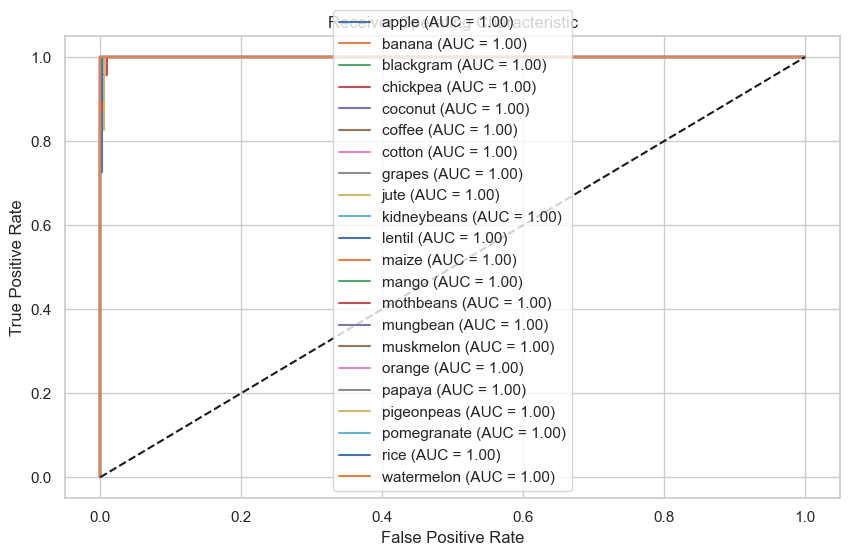

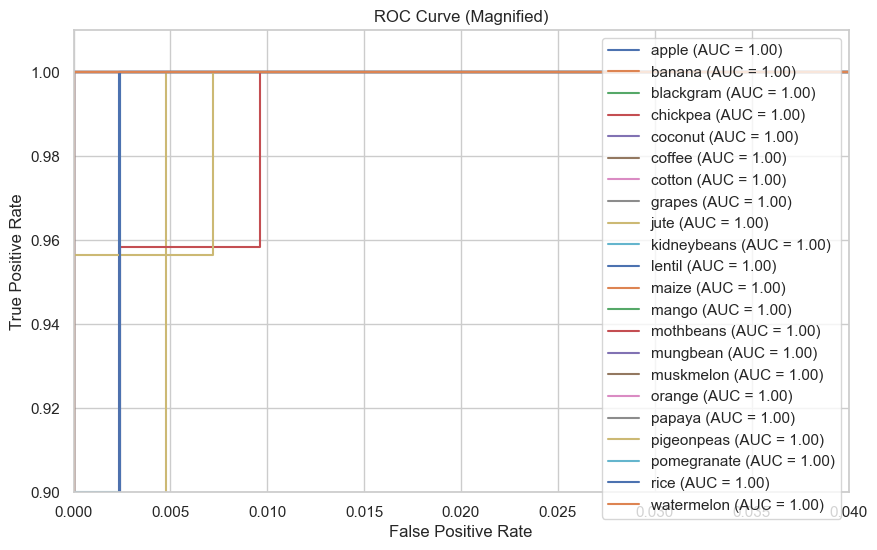


=== TABLE 1 (MEAN NPK + pH) ===

          label       N       P       K    ph
0         apple   20.80  134.22  199.89  5.93
1        banana  100.23   82.01   50.05  5.98
2     blackgram   40.02   67.47   19.24  7.13
3      chickpea   40.09   67.79   79.92  7.34
4       coconut   21.98   16.93   30.59  5.98
5        coffee  101.20   28.74   29.94  6.79
6        cotton  117.77   46.24   19.56  6.91
7        grapes   23.18  132.53  200.11  6.03
8          jute   78.40   46.86   39.99  6.73
9   kidneybeans   20.75   67.54   20.05  5.75
10       lentil   18.77   68.36   19.41  6.93
11        maize   77.76   48.44   19.79  6.25
12        mango   20.07   27.18   29.92  5.77
13    mothbeans   21.44   48.01   20.23  6.83
14     mungbean   20.99   47.28   19.87  6.72
15    muskmelon  100.32   17.72   50.08  6.36
16       orange   19.58   16.55   10.01  7.02
17       papaya   49.88   59.05   50.04  6.74
18   pigeonpeas   20.73   67.73   20.29  5.79
19  pomegranate   18.87   18.75   40.21  6.43


In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    classification_report, accuracy_score,
    precision_score, recall_score, f1_score,
    roc_curve, auc
)
from sklearn.preprocessing import label_binarize
from scipy.stats import uniform
import matplotlib.pyplot as plt

# ============================================================
# 2. LOAD DATA
# ============================================================
df = pd.read_csv("Crop_recommendation.csv")

X = df[['N','P','K','temperature','humidity','ph','rainfall']]
y_text = df['label']

le = LabelEncoder()
y = le.fit_transform(y_text)
class_names = le.classes_

# ============================================================
# 3. TRAIN–TEST SPLIT + SCALING
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ============================================================
# 4. RANDOMIZED SEARCH (COARSE TUNING)
# ============================================================
param_dist = {
    "hidden_layer_sizes": [(32,), (64,), (32, 16), (64, 32), (128, 64), (64, 64, 32)],
    "activation": ["relu", "tanh"],
    "solver": ["adam"],
    "learning_rate": ["constant", "adaptive"],
    "learning_rate_init": uniform(0.0001, 0.01),
    "alpha": uniform(0.0001, 0.01),
    "batch_size": [16, 32, 64, 128],
    "max_iter": [300]
}

rand_search = RandomizedSearchCV(
    MLPClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=2
)

rand_search.fit(X_train, y_train)
best_rand = rand_search.best_params_

# ============================================================
# 5. GRID SEARCH (FINE TUNING)
# ============================================================
param_grid = {
    "hidden_layer_sizes": [
        best_rand["hidden_layer_sizes"],
        (best_rand["hidden_layer_sizes"][0] * 2,),
        (best_rand["hidden_layer_sizes"][0], best_rand["hidden_layer_sizes"][0] // 2)
    ],
    "learning_rate_init": [
        best_rand["learning_rate_init"],
        best_rand["learning_rate_init"] / 2,
        best_rand["learning_rate_init"] * 2
    ],
    "alpha": [
        best_rand["alpha"],
        best_rand["alpha"] / 2,
        best_rand["alpha"] * 2
    ],
    "learning_rate": [best_rand["learning_rate"]],
    "activation": [best_rand["activation"]],
    "solver": ["adam"],
    "batch_size": [best_rand["batch_size"]],
    "max_iter": [500],
}

grid = GridSearchCV(
    MLPClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

# ============================================================
# 6. FINAL TRAINED OPTIMIZED MODEL
# ============================================================
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

overall_acc = round(accuracy_score(y_test, y_pred), 2)
print("\nOverall Accuracy:", overall_acc)

# ============================================================
# 7. TABLE 4 — PRECISION, RECALL, F1-SCORE, SUPPORT
# ============================================================
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
support = np.bincount(y_test)

table4 = pd.DataFrame({
    "Class": np.arange(len(class_names)),
    "Label": class_names,
    "Precision": precision.round(2),
    "Recall": recall.round(2),
    "F1-Score": f1.round(2),
    "Support": support
})

print("\n=== TABLE 4 (MODEL PERFORMANCE) ===\n")
print(table4)

# ============================================================
# 8. ROC CURVES (FIGURE 9a & 9b)
# ============================================================
y_test_bin = label_binarize(y_test, classes=np.arange(len(class_names)))
y_score = best_model.predict_proba(X_test)

# Full ROC
plt.figure(figsize=(10, 6))
for i, cls in enumerate(class_names):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{cls} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Magnified ROC
plt.figure(figsize=(10, 6))
for i, cls in enumerate(class_names):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{cls} (AUC = {roc_auc:.2f})")

plt.xlim(0, 0.04)
plt.ylim(0.90, 1.01)
plt.title("ROC Curve (Magnified)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# ============================================================
# 9. TABLE 1 — MEAN NPK & pH
# ============================================================
table1 = df.groupby("label")[["N","P","K","ph"]].mean().round(2).reset_index()
print("\n=== TABLE 1 (MEAN NPK + pH) ===\n")
print(table1)

# ============================================================
# 10. TABLE 2 — SOIL QUALITY CLASSIFICATION
# ============================================================
def classify_soil(pH):
    if pH < 4.5: return "Strongly acidic"
    elif pH <= 5.5: return "Highly acidic"
    elif pH <= 6.5: return "Moderately acidic"
    elif pH <= 7.0: return "Slightly acidic"
    elif pH == 7.0: return "Neutral"
    elif pH <= 8.0: return "Slightly alkaline"
    elif pH <= 9.0: return "Moderately alkaline"
    elif pH <= 10.0: return "Strongly alkaline"
    else: return "Very strongly alkaline"

table2 = table1.copy()
table2["Soil Quality"] = table2["ph"].apply(classify_soil)
print("\n=== TABLE 2 (SOIL QUALITY) ===\n")
print(table2)

# ============================================================
# 11. TABLE 3 — MIN–MAX NPK & pH RANGES
# ============================================================
ranges = df.groupby("label")[["N","P","K","ph"]].agg(["min","max"]).round(2)
ranges.columns = [f"{col}_{stat}" for col, stat in ranges.columns]
ranges = ranges.reset_index()

ranges["Nitrogen Range"]   = ranges["N_min"].astype(str) + "–" + ranges["N_max"].astype(str)
ranges["Phosphorus Range"] = ranges["P_min"].astype(str) + "–" + ranges["P_max"].astype(str)
ranges["Potassium Range"]  = ranges["K_min"].astype(str) + "–" + ranges["K_max"].astype(str)
ranges["pH Range"]         = ranges["ph_min"].astype(str) + "–" + ranges["ph_max"].astype(str)

table3 = ranges[["label","Nitrogen Range","Phosphorus Range","Potassium Range","pH Range"]]
print("\n=== TABLE 3 (NPK & pH RANGES) ===\n")
print(table3)
